<a href="https://colab.research.google.com/github/5ync0/DEP-ML/blob/DEP_HOUSE_PRICE/DEP_HOUSE_PRICE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import plotly.graph_objects as go
import folium
from folium.plugins import FastMarkerCluster
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score , mean_absolute_error , mean_absolute_percentage_error , mean_squared_error

In [ ]:
data = pd.read_csv("/content/Entities.csv")
data.head(5)

Unnamed: 0  property_id  location_id  \
0           0       237062         3325   
1           1       346905         3236   
2           2       386513          764   
3           3       656161          340   
4           4       841645         3226   

                                            page_url property_type     price  \
0  https://www.zameen.com/Property/g_10_g_10_2_gr...          Flat  10000000   
1  https://www.zameen.com/Property/e_11_2_service...          Flat   6900000   
2  https://www.zameen.com/Property/islamabad_g_15...         House  16500000   
3  https://www.zameen.com/Property/islamabad_bani...         House  43500000   
4  https://www.zameen.com/Property/dha_valley_dha...         House   7000000   

      location       city      province_name   latitude  longitude  baths  \
0         G-10  Islamabad  Islamabad Capital  33.679890  73.012640      2   
1         E-11  Islamabad  Islamabad Capital  33.700993  72.971492      3   
2         G-15  Islamabad  Islamabad Capital  33.631486  72.926559      6   
3    Bani Gala  Islamabad  Islamabad Capital  33.707573  73.151199      4   
4  DHA Defence  Islamabad  Islamabad Capital  33.492591  73.301339      3   

    purpose  bedrooms date_added         agency  \
0  For Sale         2   2/4/2019            NaN   
1  For Sale         3   5/4/2019            NaN   
2  For Sale         5  7/17/2019            NaN   
3  For Sale         4   4/5/2019            NaN   
4  For Sale         3  7/10/2019  Easy Property   

                                          agent  Total_Area  
0                                           NaN    1089.004  
1                                           NaN   15246.056  
2                                           NaN    2178.008  
3                                           NaN   10890.000  
4  Muhammad Junaid Ceo Muhammad Shahid Director    2178.008

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168446 entries, 0 to 168445
Data columns (total 18 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Unnamed: 0     168446 non-null  int64  
 1   property_id    168446 non-null  int64  
 2   location_id    168446 non-null  int64  
 3   page_url       168446 non-null  object 
 4   property_type  168446 non-null  object 
 5   price          168446 non-null  int64  
 6   location       168446 non-null  object 
 7   city           168446 non-null  object 
 8   province_name  168446 non-null  object 
 9   latitude       168446 non-null  float64
 10  longitude      168446 non-null  float64
 11  baths          168446 non-null  int64  
 12  purpose        168446 non-null  object 
 13  bedrooms       168446 non-null  int64  
 14  date_added     168446 non-null  object 
 15  agency         124375 non-null  object 
 16  agent          124374 non-null  object 
 17  Total_Area     168446 non-nul

In [ ]:
data.describe()

Unnamed: 0   property_id    location_id         price  \
count  168446.000000  1.684460e+05  168446.000000  1.684460e+05   
mean    84222.500000  1.559626e+07    4375.936395  1.776576e+07   
std     48626.316059  2.251207e+06    3776.561581  3.531003e+07   
min         0.000000  8.657500e+04       1.000000  0.000000e+00   
25%     42111.250000  1.488320e+07    1058.000000  1.750000e+05   
50%     84222.500000  1.665851e+07    3286.000000  8.500000e+06   
75%    126333.750000  1.708662e+07    7220.000000  1.950000e+07   
max    168445.000000  1.735772e+07   14220.000000  2.000000e+09   

            latitude      longitude          baths       bedrooms  \
count  168446.000000  168446.000000  168446.000000  168446.000000   
mean       29.859519      71.239804       2.874227       3.179422   
std         3.807870       3.133042       2.463400       1.971401   
min        11.052446      25.906027       0.000000       0.000000   
25%        24.948536      67.130363       0.000000       2.000000   
50%        31.459784      73.056182       3.000000       3.000000   
75%        33.560887      73.259870       4.000000       4.000000   
max        73.184088      80.161430     403.000000      68.000000   

         Total_Area  
count  1.684460e+05  
mean   1.394239e+04  
std    8.623647e+05  
min    0.000000e+00  
25%    1.905757e+03  
50%    4.356016e+03  
75%    1.197904e+04  
max    3.387988e+08

In [ ]:
df=data.copy()
df

Unnamed: 0  property_id  location_id  \
0                0       237062         3325   
1                1       346905         3236   
2                2       386513          764   
3                3       656161          340   
4                4       841645         3226   
...            ...          ...          ...   
168441      168441     17355248         6754   
168442      168442     17355249          680   
168443      168443     17355250         6757   
168444      168444     17355251         6752   
168445      168445     17355287        10045   

                                                 page_url property_type  \
0       https://www.zameen.com/Property/g_10_g_10_2_gr...          Flat   
1       https://www.zameen.com/Property/e_11_2_service...          Flat   
2       https://www.zameen.com/Property/islamabad_g_15...         House   
3       https://www.zameen.com/Property/islamabad_bani...         House   
4       https://www.zameen.com/Property/dha_valley_dha...         House   
...                                                   ...           ...   
168441  https://www.zameen.com/Property/gulshan_e_maym...         House   
168442  https://www.zameen.com/Property/gadap_town_gul...         House   
168443  https://www.zameen.com/Property/gulshan_e_maym...         House   
168444  https://www.zameen.com/Property/gulshan_e_maym...         House   
168445  https://www.zameen.com/Property/bahria_town_ka...         House   

           price             location       city      province_name  \
0       10000000                 G-10  Islamabad  Islamabad Capital   
1        6900000                 E-11  Islamabad  Islamabad Capital   
2       16500000                 G-15  Islamabad  Islamabad Capital   
3       43500000            Bani Gala  Islamabad  Islamabad Capital   
4        7000000          DHA Defence  Islamabad  Islamabad Capital   
...          ...                  ...        ...                ...   
168441  26500000           Gadap Town    Karachi              Sindh   
168442  12500000           Gadap Town    Karachi              Sindh   
168443  27000000           Gadap Town    Karachi              Sindh   
168444  11000000           Gadap Town    Karachi              Sindh   
168445   9000000  Bahria Town Karachi    Karachi              Sindh   

         latitude  longitude  baths   purpose  bedrooms date_added  \
0       33.679890  73.012640      2  For Sale         2   2/4/2019   
1       33.700993  72.971492      3  For Sale         3   5/4/2019   
2       33.631486  72.926559      6  For Sale         5  7/17/2019   
3       33.707573  73.151199      4  For Sale         4   4/5/2019   
4       33.492591  73.301339      3  For Sale         3  7/10/2019   
...           ...        ...    ...       ...       ...        ...   
168441  25.029909  67.137192      0  For Sale         6  7/18/2019   
168442  25.017951  67.136393      0  For Sale         3  7/18/2019   
168443  25.015384  67.116330      0  For Sale         6  7/18/2019   
168444  25.013265  67.120818      0  For Sale         3  7/18/2019   
168445  25.113565  67.353811      3  For Sale         3  7/18/2019   

                            agency  \
0                              NaN   
1                              NaN   
2                              NaN   
3                              NaN   
4                    Easy Property   
...                            ...   
168441       Al Shahab Enterprises   
168442       Al Shahab Enterprises   
168443       Al Shahab Enterprises   
168444       Al Shahab Enterprises   
168445  ZPN Real Estate & Builders   

                                               agent  Total_Area  
0                                                NaN    1089.004  
1                                                NaN   15246.056  
2                                                NaN    2178.008  
3                                                NaN   10890.000  
4       Muhammad Junaid Ceo Muhammad Shahid 

In [ ]:
df.info()
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168446 entries, 0 to 168445
Data columns (total 18 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Unnamed: 0     168446 non-null  int64  
 1   property_id    168446 non-null  int64  
 2   location_id    168446 non-null  int64  
 3   page_url       168446 non-null  object 
 4   property_type  168446 non-null  object 
 5   price          168446 non-null  int64  
 6   location       168446 non-null  object 
 7   city           168446 non-null  object 
 8   province_name  168446 non-null  object 
 9   latitude       168446 non-null  float64
 10  longitude      168446 non-null  float64
 11  baths          168446 non-null  int64  
 12  purpose        168446 non-null  object 
 13  bedrooms       168446 non-null  int64  
 14  date_added     168446 non-null  object 
 15  agency         124375 non-null  object 
 16  agent          124374 non-null  object 
 17  Total_Area     168446 non-nul

Unnamed: 0  property_id  location_id  \
0                0       237062         3325   
1                1       346905         3236   
2                2       386513          764   
3                3       656161          340   
4                4       841645         3226   
...            ...          ...          ...   
168441      168441     17355248         6754   
168442      168442     17355249          680   
168443      168443     17355250         6757   
168444      168444     17355251         6752   
168445      168445     17355287        10045   

                                                 page_url property_type  \
0       https://www.zameen.com/Property/g_10_g_10_2_gr...          Flat   
1       https://www.zameen.com/Property/e_11_2_service...          Flat   
2       https://www.zameen.com/Property/islamabad_g_15...         House   
3       https://www.zameen.com/Property/islamabad_bani...         House   
4       https://www.zameen.com/Property/dha_valley_dha...         House   
...                                                   ...           ...   
168441  https://www.zameen.com/Property/gulshan_e_maym...         House   
168442  https://www.zameen.com/Property/gadap_town_gul...         House   
168443  https://www.zameen.com/Property/gulshan_e_maym...         House   
168444  https://www.zameen.com/Property/gulshan_e_maym...         House   
168445  https://www.zameen.com/Property/bahria_town_ka...         House   

           price             location       city      province_name  \
0       10000000                 G-10  Islamabad  Islamabad Capital   
1        6900000                 E-11  Islamabad  Islamabad Capital   
2       16500000                 G-15  Islamabad  Islamabad Capital   
3       43500000            Bani Gala  Islamabad  Islamabad Capital   
4        7000000          DHA Defence  Islamabad  Islamabad Capital   
...          ...                  ...        ...                ...   
168441  26500000           Gadap Town    Karachi              Sindh   
168442  12500000           Gadap Town    Karachi              Sindh   
168443  27000000           Gadap Town    Karachi              Sindh   
168444  11000000           Gadap Town    Karachi              Sindh   
168445   9000000  Bahria Town Karachi    Karachi              Sindh   

         latitude  longitude  baths   purpose  bedrooms date_added  \
0       33.679890  73.012640      2  For Sale         2   2/4/2019   
1       33.700993  72.971492      3  For Sale         3   5/4/2019   
2       33.631486  72.926559      6  For Sale         5  7/17/2019   
3       33.707573  73.151199      4  For Sale         4   4/5/2019   
4       33.492591  73.301339      3  For Sale         3  7/10/2019   
...           ...        ...    ...       ...       ...        ...   
168441  25.029909  67.137192      0  For Sale         6  7/18/2019   
168442  25.017951  67.136393      0  For Sale         3  7/18/2019   
168443  25.015384  67.116330      0  For Sale         6  7/18/2019   
168444  25.013265  67.120818      0  For Sale         3  7/18/2019   
168445  25.113565  67.353811      3  For Sale         3  7/18/2019   

                            agency  \
0                              NaN   
1                              NaN   
2                              NaN   
3                              NaN   
4                    Easy Property   
...                            ...   
168441       Al Shahab Enterprises   
168442       Al Shahab Enterprises   
168443       Al Shahab Enterprises   
168444       Al Shahab Enterprises   
168445  ZPN Real Estate & Builders   

                                               agent  Total_Area  
0                                                NaN    1089.004  
1                                                NaN   15246.056  
2                                                NaN    2178.008  
3                                                NaN   10890.000  
4       Muhammad Junaid Ceo Muhammad Shahid 

In [ ]:
df = df.drop(['Unnamed: 0'],axis=1)

In [ ]:
df

property_id  location_id  \
0            237062         3325   
1            346905         3236   
2            386513          764   
3            656161          340   
4            841645         3226   
...             ...          ...   
168441     17355248         6754   
168442     17355249          680   
168443     17355250         6757   
168444     17355251         6752   
168445     17355287        10045   

                                                 page_url property_type  \
0       https://www.zameen.com/Property/g_10_g_10_2_gr...          Flat   
1       https://www.zameen.com/Property/e_11_2_service...          Flat   
2       https://www.zameen.com/Property/islamabad_g_15...         House   
3       https://www.zameen.com/Property/islamabad_bani...         House   
4       https://www.zameen.com/Property/dha_valley_dha...         House   
...                                                   ...           ...   
168441  https://www.zameen.com/Property/gulshan_e_maym...         House   
168442  https://www.zameen.com/Property/gadap_town_gul...         House   
168443  https://www.zameen.com/Property/gulshan_e_maym...         House   
168444  https://www.zameen.com/Property/gulshan_e_maym...         House   
168445  https://www.zameen.com/Property/bahria_town_ka...         House   

           price             location       city      province_name  \
0       10000000                 G-10  Islamabad  Islamabad Capital   
1        6900000                 E-11  Islamabad  Islamabad Capital   
2       16500000                 G-15  Islamabad  Islamabad Capital   
3       43500000            Bani Gala  Islamabad  Islamabad Capital   
4        7000000          DHA Defence  Islamabad  Islamabad Capital   
...          ...                  ...        ...                ...   
168441  26500000           Gadap Town    Karachi              Sindh   
168442  12500000           Gadap Town    Karachi              Sindh   
168443  27000000           Gadap Town    Karachi              Sindh   
168444  11000000           Gadap Town    Karachi              Sindh   
168445   9000000  Bahria Town Karachi    Karachi              Sindh   

         latitude  longitude  baths   purpose  bedrooms date_added  \
0       33.679890  73.012640      2  For Sale         2   2/4/2019   
1       33.700993  72.971492      3  For Sale         3   5/4/2019   
2       33.631486  72.926559      6  For Sale         5  7/17/2019   
3       33.707573  73.151199      4  For Sale         4   4/5/2019   
4       33.492591  73.301339      3  For Sale         3  7/10/2019   
...           ...        ...    ...       ...       ...        ...   
168441  25.029909  67.137192      0  For Sale         6  7/18/2019   
168442  25.017951  67.136393      0  For Sale         3  7/18/2019   
168443  25.015384  67.116330      0  For Sale         6  7/18/2019   
168444  25.013265  67.120818      0  For Sale         3  7/18/2019   
168445  25.113565  67.353811      3  For Sale         3  7/18/2019   

                            agency  \
0                              NaN   
1                              NaN   
2                              NaN   
3                              NaN   
4                    Easy Property   
...                            ...   
168441       Al Shahab Enterprises   
168442       Al Shahab Enterprises   
168443       Al Shahab Enterprises   
168444       Al Shahab Enterprises   
168445  ZPN Real Estate & Builders   

                                               agent  Total_Area  
0                                                NaN    1089.004  
1                                                NaN   15246.056  
2                                                NaN    2178.008  
3                                                NaN   10890.000  
4       Muhammad Junaid Ceo Muhammad Shahid Director    2178.008  
...                                              ...         ...  
168441                                       Shahmir  

In [ ]:
df.columns

Index(['property_id', 'location_id', 'page_url', 'property_type', 'price',
       'location', 'city', 'province_name', 'latitude', 'longitude', 'baths',
       'purpose', 'bedrooms', 'date_added', 'agency', 'agent', 'Total_Area'],
      dtype='object')

In [ ]:
df.isnull().sum()

property_id          0
location_id          0
page_url             0
property_type        0
price                0
location             0
city                 0
province_name        0
latitude             0
longitude            0
baths                0
purpose              0
bedrooms             0
date_added           0
agency           44071
agent            44072
Total_Area           0
dtype: int64

<Axes: >

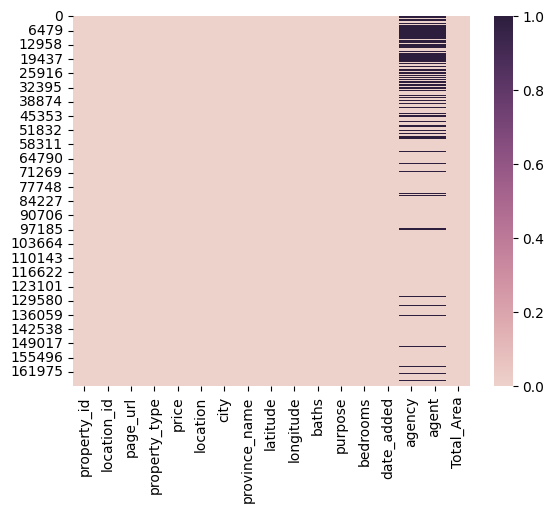

In [ ]:
sns.heatmap( df.isnull(),cmap=sns.cubehelix_palette(as_cmap=True))

In [ ]:
fill_list = df['agency'].dropna()
df['agency'] = df['agency'].fillna(pd.Series(np.random.choice(fill_list , size = len(df.index))))

In [ ]:
fill_list=df['agent'].dropna()
df['agent']=df['agent'].fillna(pd.Series(np.random.choice(fill_list,size=len(df.index))))

In [ ]:
df.isnull().sum()

property_id      0
location_id      0
page_url         0
property_type    0
price            0
location         0
city             0
province_name    0
latitude         0
longitude        0
baths            0
purpose          0
bedrooms         0
date_added       0
agency           0
agent            0
Total_Area       0
dtype: int64

<Axes: >

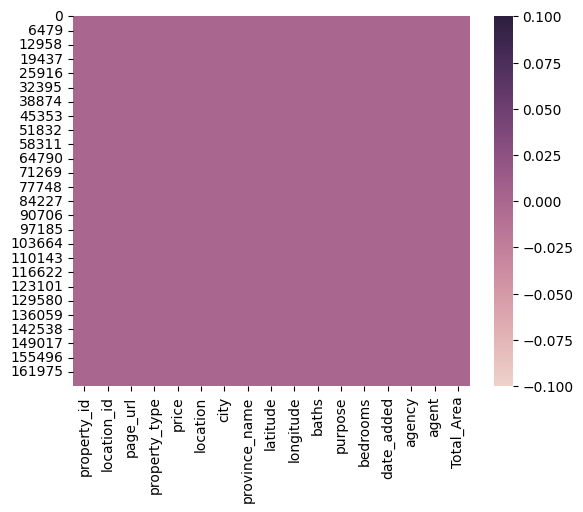

In [ ]:
sns.heatmap( df.isnull(),cmap=sns.cubehelix_palette(as_cmap=True))

In [ ]:
fig = px.pie(df, names='province_name', title='province_name',color_discrete_sequence=px.colors.sequential.RdBu)
fig.show()

<Axes: xlabel='province_name', ylabel='price'>

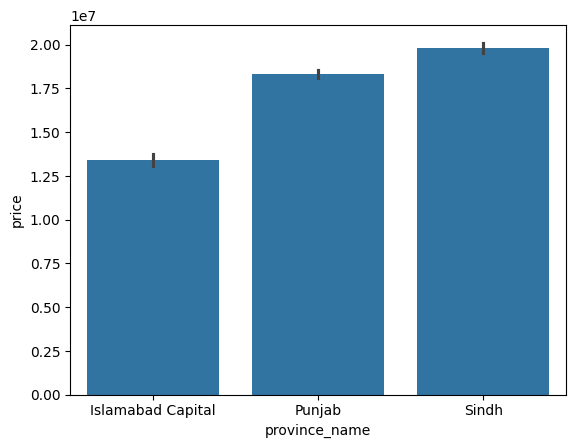

In [ ]:
sns.barplot(x='province_name',y='price',data=df)

<Axes: xlabel='baths', ylabel='Count'>

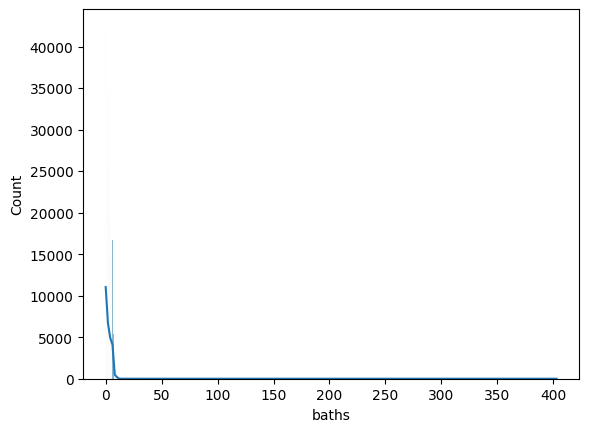

In [ ]:
sns.histplot(data=df, x="baths", kde=True)

In [ ]:
fig = px.pie(df,names='purpose',title='purpose',color_discrete_sequence=px.colors.sequential.Aggrnyl)
fig.show()

<Axes: xlabel='bedrooms', ylabel='Count'>

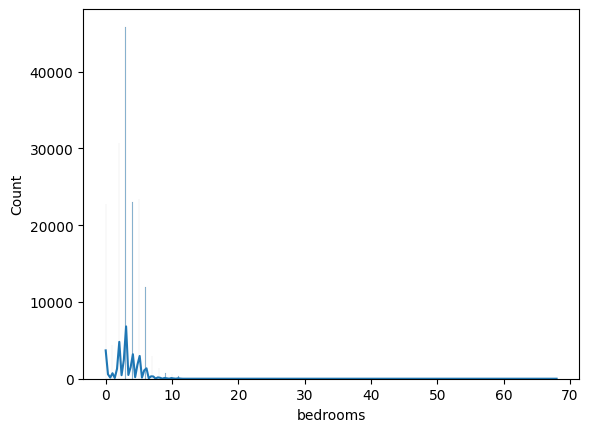

In [ ]:
sns.histplot(data=df, x="bedrooms", kde=True)

In [ ]:
px.scatter(df.sample(2000),
           title='Total_Area vs price.',
           x='Total_Area',
           y='price',
           )

In [ ]:
px.scatter(df.sample(2000),
           title='Total_Area vs price.',
           x='Total_Area',
           y='price',
           color='purpose')


<Axes: xlabel='purpose', ylabel='count'>

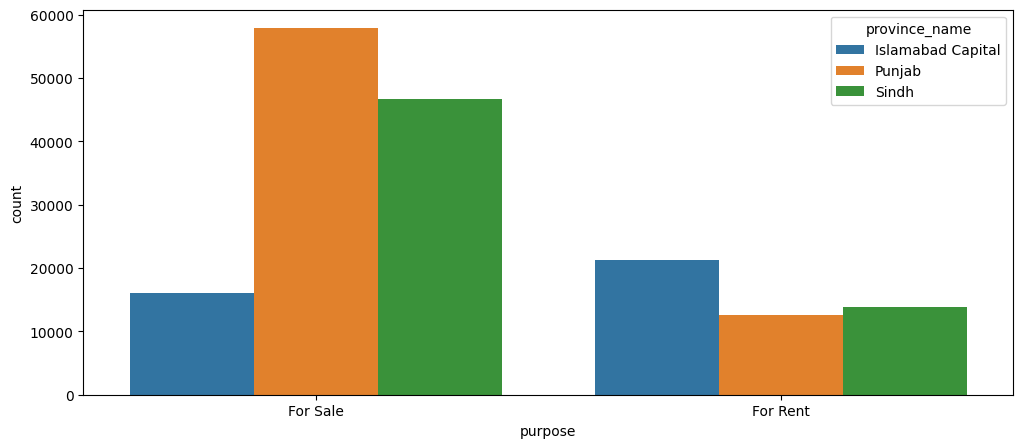

In [ ]:
plt.figure(figsize=(12,5))
sns.countplot(data=df, x="purpose", hue="province_name")

<Axes: xlabel='city', ylabel='count'>

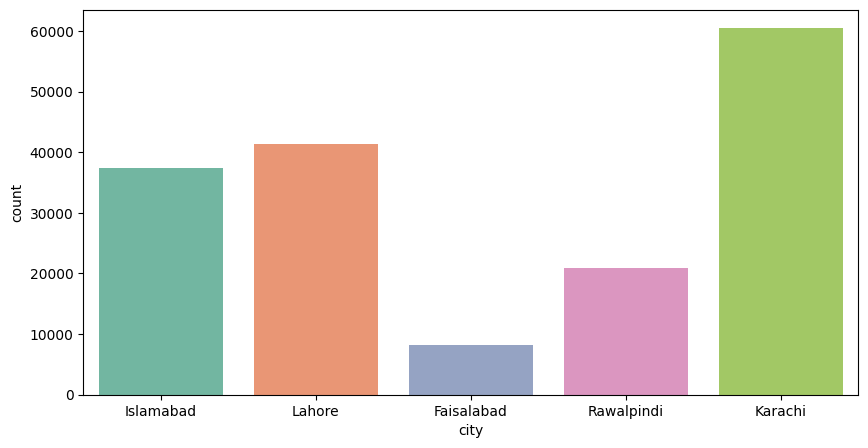

In [ ]:
plt.figure(figsize = (10,5))
sns.countplot(x= df["city"], palette="Set2")

<Axes: xlabel='purpose', ylabel='count'>

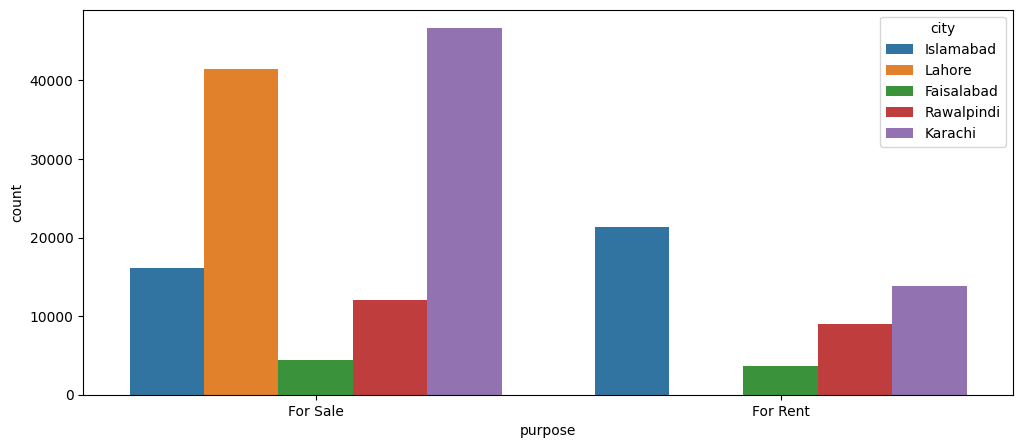

In [ ]:
plt.figure(figsize=(12,5))
sns.countplot(data=df, x="purpose", hue="city")

<Axes: xlabel='city', ylabel='price'>

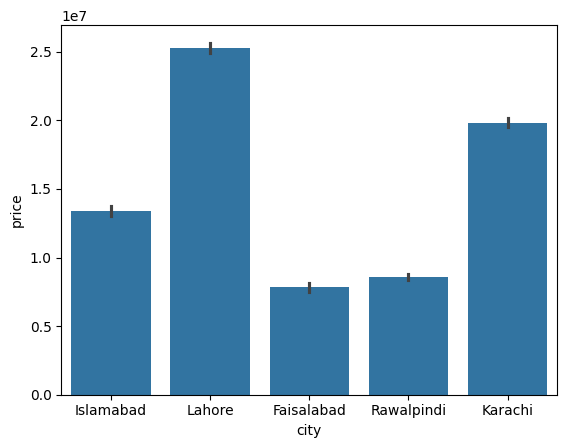

In [ ]:
sns.barplot(x='city',y='price',data=df)

In [ ]:
latitudes = np.array(df['latitude'])
longitudes = np.array(df['longitude'])
la_mean = latitudes.mean()
lo_mean = longitudes.mean()
locations = list(zip(latitudes, longitudes))

m = folium.Map(location=[la_mean, lo_mean], zoom_start= 11.5)
FastMarkerCluster(data=locations).add_to(m)
m

In [ ]:
df.describe(include=object)

page_url property_type  \
count                                              168446        168446   
unique                                             168446             7   
top     https://www.zameen.com/Property/g_10_g_10_2_gr...         House   
freq                                                    1        105468   

           location     city province_name   purpose date_added  \
count        168446   168446        168446    168446     168446   
unique         1509        5             3         2        124   
top     DHA Defence  Karachi        Punjab  For Sale   7/3/2019   
freq          22046    60484         70536    120655       9485   

                             agency      agent  
count                        168446     168446  
unique                         5761      10598  
top     Real Investment Consultants  Boez Ayub  
freq                           1071       1038

In [ ]:
le = LabelEncoder()

In [ ]:
cols = ['page_url', 'property_type', 'location','city','province_name','purpose','date_added','agency','agent']

df[cols] = df[cols].apply(LabelEncoder().fit_transform)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168446 entries, 0 to 168445
Data columns (total 17 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   property_id    168446 non-null  int64  
 1   location_id    168446 non-null  int64  
 2   page_url       168446 non-null  int64  
 3   property_type  168446 non-null  int64  
 4   price          168446 non-null  int64  
 5   location       168446 non-null  int64  
 6   city           168446 non-null  int64  
 7   province_name  168446 non-null  int64  
 8   latitude       168446 non-null  float64
 9   longitude      168446 non-null  float64
 10  baths          168446 non-null  int64  
 11  purpose        168446 non-null  int64  
 12  bedrooms       168446 non-null  int64  
 13  date_added     168446 non-null  int64  
 14  agency         168446 non-null  int64  
 15  agent          168446 non-null  int64  
 16  Total_Area     168446 non-null  float64
dtypes: float64(3), int64(14)
memo

<Axes: >

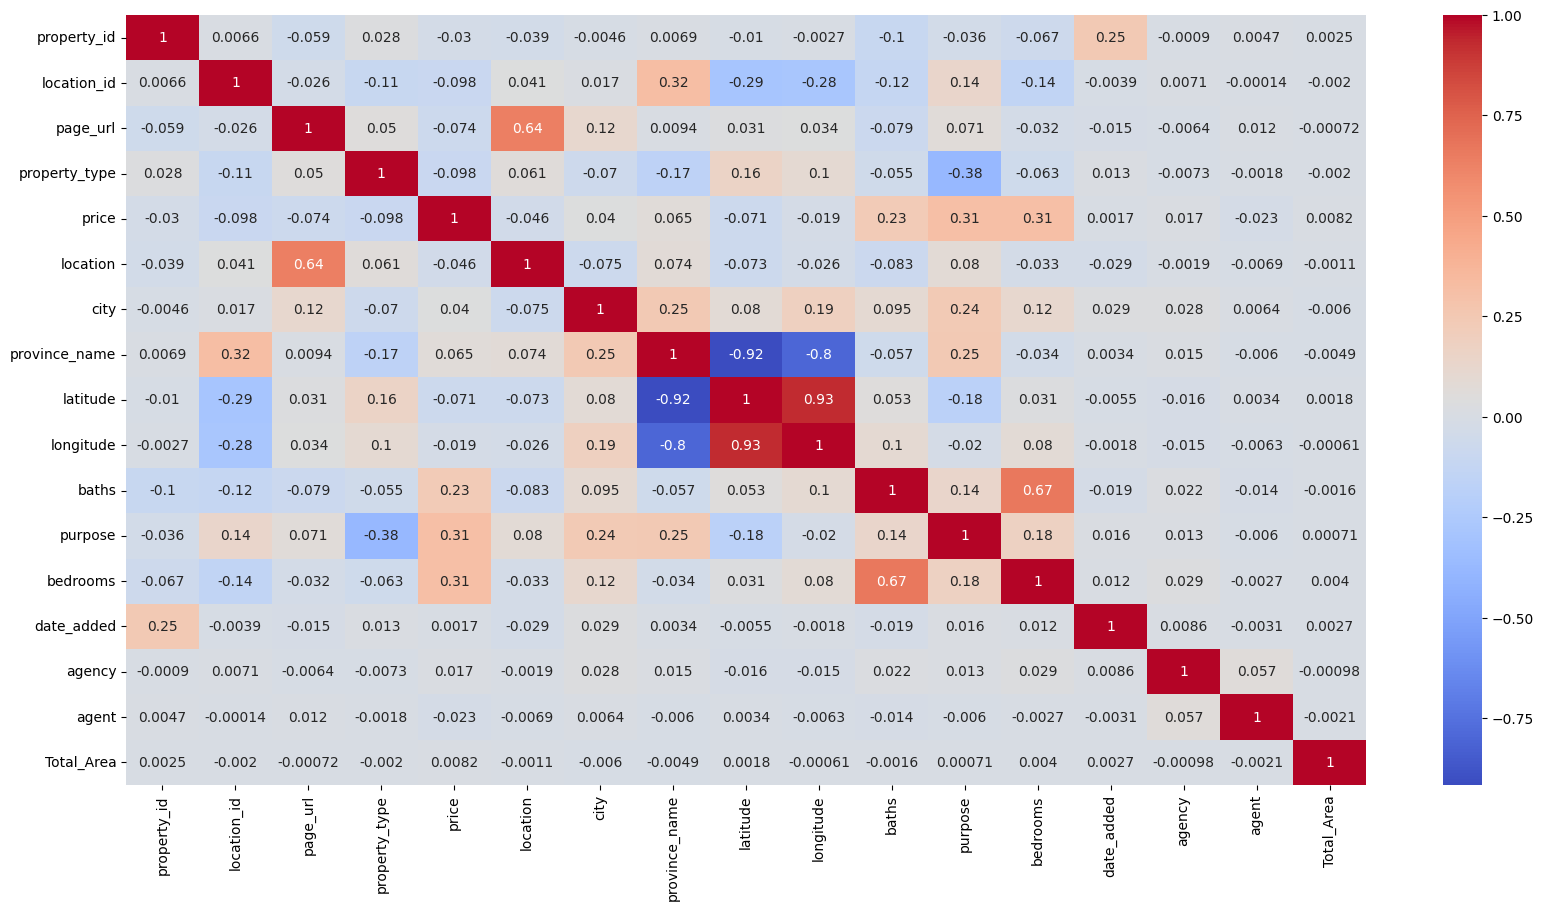

In [ ]:
plt.figure(figsize = (20,10))
sns.heatmap(df.corr() , annot = True , cmap = "coolwarm")

In [ ]:
x=df.drop('price',axis=1).values

In [ ]:
y=df['price'].values

In [ ]:
x_train , x_test , y_train , y_test = train_test_split(x,y, test_size=  0.25, random_state= 42)

In [ ]:
random_forest=RandomForestRegressor()
random_forest.fit(x_train , y_train)
print("Random Forest Training Accuracy:", random_forest.score(x_train , y_train))
print("Random Forest Testing Accuracy:", random_forest.score(x_test , y_test))

Random Forest Training Accuracy: 0.9651950829438826
Random Forest Testing Accuracy: 0.7903913740829107


In [ ]:
y_pred = random_forest.predict(x_test)
y_pred

In [ ]:
y_pred = random_forest.predict(x_test)
df4 = pd.DataFrame({"Y_test": y_test , "Y_pred" : y_pred})
df4.head(20)

In [ ]:
plt.figure(figsize= (20,6))

plt.plot(df4[:500])
plt.legend(["Actual" , "Predicted"])

In [ ]:
random_forest_r2 = r2_score(y_test , y_pred)
random_forest_r2

In [ ]:
mse = mean_squared_error (y_test , y_pred)
print (mse)

mae = mean_absolute_error (y_test , y_pred)
print (mae)

mape = mean_absolute_percentage_error (y_test , y_pred)
print (mape)